Exploring node: A, Current Path: A, Cost (G): 0, Heuristic (H): 7, F(n): 7
  Pushing to PQ: Neighbor: B, New G: 1, Heuristic: 6, F(n): 7, Path: A
  Pushing to PQ: Neighbor: C, New G: 4, Heuristic: 2, F(n): 6, Path: A
Exploring node: C, Current Path: A -> C, Cost (G): 4, Heuristic (H): 2, F(n): 6
  Pushing to PQ: Neighbor: B, New G: 6, Heuristic: 6, F(n): 12, Path: A -> C
  Pushing to PQ: Neighbor: D, New G: 5, Heuristic: 0, F(n): 5, Path: A -> C
Exploring node: D, Current Path: A -> C -> D, Cost (G): 5, Heuristic (H): 0, F(n): 5
Goal node D reached!

Path from A to D: A -> C -> D
Total cost (G): 5


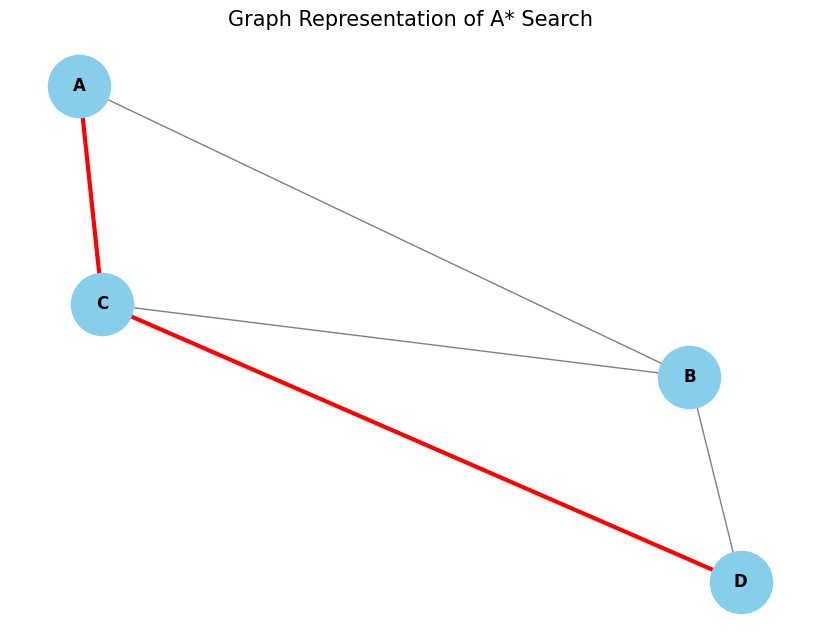

In [ ]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

# Define the graph as a dictionary of cities and their neighbors with edge costs
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}

# Define the heuristic values for each node (H(n))
heuristics = {
    'A': 7,  # Example heuristic values, representing estimated cost to goal
    'B': 6,
    'C': 2,
    'D': 0  # Goal node D
}

# A* search algorithm to find the shortest path
def a_star_search(start, goal):
    # Priority Queue to store nodes to be explored (F(n), G(n), node, path_taken)
    pq = [(heuristics[start], 0, start, [])]  # F(n) = H(n) for start node
    visited = set()  # Set to track visited cities
    explored = []  # List to track the nodes visited during the search

    while pq:
        # Pop the node with the lowest F(n)
        f_value, g_value, node, path = heapq.heappop(pq)

        # Print the current state of the search
        print(f"Exploring node: {node}, Current Path: {' -> '.join(path + [node])}, Cost (G): {g_value}, Heuristic (H): {heuristics[node]}, F(n): {f_value}")

        # If the goal node is found, return the path and cost
        if node == goal:
            print(f"Goal node {goal} reached!")
            return path + [node], g_value

        # Skip the node if it has already been visited
        if node in visited:
            continue

        # Mark the node as visited
        visited.add(node)

        # Add the neighboring nodes to the priority queue
        for neighbor, edge_cost in graph[node].items():
            if neighbor not in visited:
                new_g = g_value + edge_cost  # New G(n) value (cost to reach the neighbor)
                f_value_new = new_g + heuristics[neighbor]  # New F(n) = G(n) + H(n)
                heapq.heappush(pq, (f_value_new, new_g, neighbor, path + [node]))
                print(f"  Pushing to PQ: Neighbor: {neighbor}, New G: {new_g}, Heuristic: {heuristics[neighbor]}, F(n): {f_value_new}, Path: {' -> '.join(path + [node])}")

        # Track the visited node in the explored list
        explored.append(node)

    return None, float('inf')  # If the goal is not reachable

# Visualizing the graph and the path using NetworkX and Matplotlib
def plot_graph(path=None):
    # Create a graph object
    G = nx.Graph()

    # Add edges from the graph dictionary
    for node, neighbors in graph.items():
        for neighbor, cost in neighbors.items():
            G.add_edge(node, neighbor, weight=cost)

    # Create a layout for the nodes
    pos = nx.spring_layout(G)  # Spring layout for node placement

    # Draw the nodes, edges, and labels
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=12, font_weight='bold', edge_color='gray')

    # If a path is provided, highlight it in red
    if path:
        path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    # Display the plot
    plt.title("Graph Representation of A* Search", fontsize=15)
    plt.show()

# Test the A* algorithm
start_node = 'A'
goal_node = 'D'
path, total_cost = a_star_search(start_node, goal_node)

# Display the result with detailed information
if path:
    print(f"\nPath from {start_node} to {goal_node}: {' -> '.join(path)}")
    print(f"Total cost (G): {total_cost}")
else:
    print(f"No path found from {start_node} to {goal_node}")

# Plot the graph with the path found
plot_graph(path)
